In [ ]:
# A7 Michelson interference 
by H cyan 
 
huangzw29@mail2.sysu.edu.cn

2021.3.11

## EXP1 measure the refractive index (n) of the sample

### EXP1.1 Measure the thickness of the sample 

In [6]:
import math
import numpy as np

p1 = np.array([2.510,2.512,2.510,2.512,2.511])
print (p1)

print ('mean of p1 is',p1.mean())
print ('std of p1 is',p1.std(ddof=1)/math.sqrt(p1.size))
# ddof: set the degree of freedom

[2.51  2.512 2.51  2.512 2.511]
mean of p1 is 2.511
std of p1 is 0.000447213595500008


### EXP1.2 Calculate the refractive index (n) of the sample

[1.2255997847795934, 1.3490307739871472, 1.3605778736329184, 1.3738413877954316, 1.3930831065995815, 1.2781234061819449, 1.2317596704303881, 1.1984750686215964, 1.1981549073800513, 1.1981753859792041]
mean of n is 1.2806821365387857
std of p1 is 0.025424751486760887


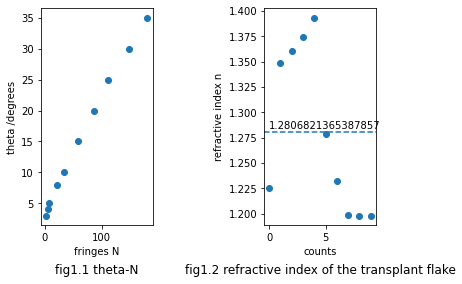

In [7]:
import matplotlib.pyplot as plt

N=np.array([2,5,8,21,34,58,86,110,147,180])
theta=np.array([3,4,5,8,10,15,20,25,30,35])

t=p1.mean()*0.001 # average thickness of the sample
lam=632.8*0.000000001 # wavelengh

nlist=[] # refractive index
counts=[] 


def f(i,j):
    n=(t*math.sin(i)*math.sin(i))/(2*t*(1-math.cos(i))-j*lam)+(1-math.cos(i)-(j*lam/(2*t)))
    nlist.append(n)

for idx in range(0,10):
    counts.append(idx)
    i=math.radians(theta[idx])
    j=N[idx]
    f(i,j)

print(nlist)


fig, axes = plt.subplots(1,2)
axes[0].scatter(N,theta)
axes[1].scatter(np.array(counts),np.array(nlist))

axes[0].set_xlabel('fringes N')
axes[0].set_ylabel('theta /degrees')
axes[0].set_title('fig1.1 theta-N',y=-0.25)

axes[1].set_xlabel('counts')
axes[1].set_ylabel('refractive index n')
#draw the line of the mean value
axes[1].axhline(np.array(nlist).mean(),ls='--') 
axes[1].text(0,np.array(nlist).mean()+0.003,np.array(nlist).mean())
axes[1].set_title('fig1.2 refractive index of the transplant flake',y=-0.25)

plt.subplots_adjust(wspace=1)

print ('mean of n is',np.array(nlist).mean())
print ('std of p1 is',np.array(nlist).std(ddof=1)/math.sqrt(np.array(nlist).size))

## EXP2 measure the refractive index (n) of the air

[  6  16  26  38  48  60  74  88  98 108 122 134 146 156 170 180 192 204
 216]
[1.000193795, 1.00014534625, 1.0001341657692309, 1.0001223968421054, 1.000121121875, 1.000116277, 1.0001099917567569, 1.0001057063636363, 1.000106785, 1.0001076638888888, 1.0001048399180328, 1.0001041286567165, 1.0001035343150686, 1.000104351153846, 1.0001025973529412, 1.0001033573333333, 1.00010295359375, 1.0001025973529412, 1.0001022806944444]


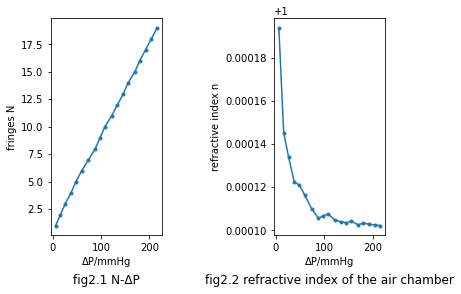

In [8]:
p = np.array([288,278,268,256,246,234,220,206,196,186,172,160,148,138,124,114,102,90,78])
# 'P' is the reading of barometer
pmax=294
deltaPList=pmax-p  
print(deltaPList)

l=0.08 # lengh of the air chamber

nAIRlist=[]
Nlist=[]

for idx in range(0,19):
    N=idx+1
    deltaP=deltaPList[idx]
    nAIR=1+(N*lam/(2*l))*(pmax/deltaP) # nAIR represents the n of the air
    nAIRlist.append(nAIR)
    Nlist.append(N)

print(nAIRlist)

fig, axes = plt.subplots(1,2)
axes[0].plot(deltaPList,Nlist,'.-')
axes[1].plot(deltaPList,nAIRlist,'.-')

axes[0].set_xlabel('ΔP/mmHg')
axes[0].set_ylabel('fringes N')
axes[0].set_title('fig2.1 N-ΔP',y=-0.25)

axes[1].set_xlabel('ΔP/mmHg')
axes[1].set_ylabel('refractive index n')
axes[1].set_title('fig2.2 refractive index of the air chamber',y=-0.25)

plt.subplots_adjust(wspace=1)


### EXP2.1 Use fig2.1 to caculate the n of air in 1 atm

m=  0.08461007390435338
n=  0.7285171645772646
[[ 1.74250642e-07 -1.90942020e-05]
 [-1.90942020e-05  2.82223687e-03]]
the refractive index of 1 atm air is 1.0001012633410196


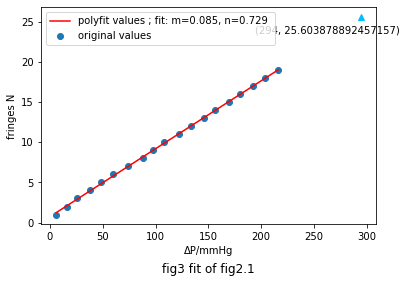

In [9]:
from scipy.optimize import curve_fit

deltaP=deltaPList
N=Nlist

def func(deltaP, m, n):
    return m*deltaP+n

popt, pcov = curve_fit(func, deltaP, Nlist)
m = popt[0] 
n = popt[1]
yvals = func(deltaP,m,n) 

plot1 = plt.scatter(deltaP, Nlist, label='original values')
plot2 = plt.plot(deltaP, yvals, 'r', label='polyfit values ; fit: m=%5.3f, n=%5.3f ' % tuple(popt))

plt.xlabel('ΔP/mmHg')
plt.ylabel('fringes N')
plt.title('fig3 fit of fig2.1',y=-0.25)
plt.legend()

# find the point of 1 atm. Remember, the values of x is the difference between the reedings and pmax.
x=pmax
y=func(pmax,m,n)
plt.plot(x,y,'^',color='deepskyblue')
plt.text(x-100,y-2,(x,y))

print('m= ',m)
print('n= ',n)
print(pcov)

# caculate the refractive index n of the air in 1 atm
nAIRatm=1+(y*lam/(2*l))*(pmax/x)
print('the refractive index of 1 atm air is', nAIRatm)

### EXP2.2 Use fig2.2 to caculate

a=  0.0005830044551320347
b=  1.000102246547363
[[ 7.31445448e-10 -1.65881360e-11]
 [-1.65881360e-11  1.36331498e-12]]
the refractive index of 1 atm air is 1.0001042295557139


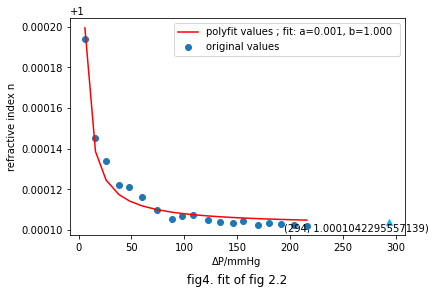

In [10]:
deltaP=deltaPList
nAIR=nAIRlist

def func(deltaP, a, b):
    return a/deltaP+b

popt, pcov = curve_fit(func, deltaP, nAIR)
a = popt[0] 
b = popt[1]
yvals = func(deltaP,a,b) 

plot1 = plt.scatter(deltaP, nAIR, label='original values')
plot2 = plt.plot(deltaP, yvals, 'r', label='polyfit values ; fit: a=%5.3f, b=%5.3f ' % tuple(popt))

plt.xlabel('ΔP/mmHg')
plt.ylabel('refractive index n')
plt.title('fig4. fit of fig 2.2',y=-0.25)
plt.legend()

# find the point of 1 atm.
x=pmax
y=func(pmax,a,b)
plt.plot(x,y,'^',color='deepskyblue')
plt.text(x-100,y-0.000005,(x,y))

print('a= ',a)
print('b= ',b)
print(pcov)
print('the refractive index of 1 atm air is', y)